# Forward scattering thin screen

M Kenworthy // Leiden Observatory // kenworthy@strw.leidenuinv.nl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u


## HG scattering

Defining the Henyey and Greenstein (1948) scattering function


In [65]:
@u.quantity_input
def hg(theta:u.rad, g=0.):
    top = 1 - g*g
    bot = np.power((1+g*g-(2*g*np.cos(theta))), 1.5)
    return top / (4*np.pi*u.sr * bot)

## check that HG produces reasonable functions

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  after removing the cwd from sys.path.


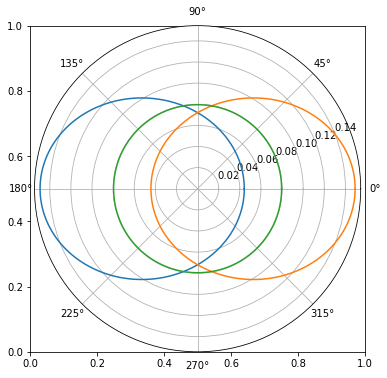

In [81]:
fig, ax = plt.subplots(figsize=(6,6))
thet = np.linspace(0, 2*np.pi * u.rad, 500)

plt.polar(thet, hg(thet,-0.2))
plt.polar(thet, hg(thet,0.2))
plt.polar(thet, hg(thet,0.0))


total flux through 4pi steradian sphere is 1.00


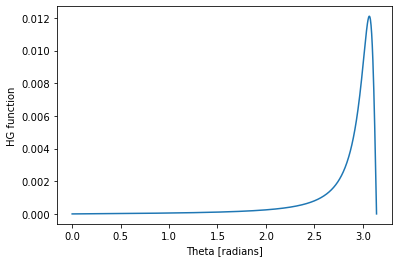

In [82]:
npoi = 1000
dthet = np.pi*u.rad/npoi

thet = np.linspace(0.000*u.rad, (3.14159) * u.rad, npoi)

# onion ring of solid angle! this has a perimeter of 2pi.sin(theta) and width dthet
# so we've taken the flux per steradian at angle theta, hg(theta)
# and multiplied it by the solid angle of the onion ring and 

onion_ring_solid_angle = (2*np.pi * u.rad * np.sin(thet) * dthet).to(u.sr) # onion ring is steradians
flux_of_onion_ring = onion_ring_solid_angle * hg(thet,-0.9) # steradians per onion ring * flux at theta per steradian
plt.plot(thet, flux_of_onion_ring)

# adding up all the onion rings makes one onion!
print("total flux through 4pi steradian sphere is {:.2f}".format(np.sum(flux_of_onion_ring)))
plt.xlabel('Theta [radians]');
plt.ylabel('HG function');
